<a href="https://colab.research.google.com/github/JulioOsima/PCS3111-2023-MACOS/blob/main/Julio_Noriyuki_Osima_Introdu%C3%A7%C3%A3o_ao_Python_para_m%C3%A9todos_num%C3%A9ricos_2024_alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para Métodos Numéricos

### Métodos Numéricos e Aplicações
Março 2024



---



---



*Referências*:

[0] Python for Scientific Computing. https://aaltoscicomp.github.io/python-for-scicomp/python/

[1]   Van Der Walt, S., Colbert, S.C. and Varoquaux, G., 2011. The NumPy array: a structure for efficient numerical computation. Computing in science & engineering, 13(2), pp.22-30. https://hal.inria.fr/inria-00564007/en

[2]  Varoquaux, G., Gouillart, E., Vahtras, O., Haenel, V., Rougier, N.P., Gommers, R., Pedregosa, F., Jędrzejewski-Szmek, Z., Virtanen, P., Combelles, C. and Pinte, D., 2015. Scipy lecture notes. https://scipy-lectures.org/index.html




---


## Qual a intenção desse notebook e dessa atividade?

Nesse notebook vamos revisar alguns conceitos de Python fundamentais para a computação científica e o desenvolvimento de métodos numéricos para problemas aplicados.

Ao final espera-se que você entenda que é preciso atenção ao programar em Python certas operações que usam vetores, matrizes e laços (for).



---






## Brevíssima introdução ao Python

Baseado em Python for Scientific Computing, https://aaltoscicomp.github.io/python-for-scicomp/python/

In [ ]:
# Escalares
#------------------------

i = 42       # integer
print(i, type(i))

igrande = 2**77    # Integers have arbitrary precision
print(igrande, type(igrande))

g = 3.14     # floating point number
print(g, type(g))

c = 2 - 3j   # Complex number
print(c, type(c))

b = True     # boolean
print(b, type(b))

s = "Hello!" # String (Unicode)
print(s, type(s))


42 <class 'int'>
151115727451828646838272 <class 'int'>
3.14 <class 'float'>
(2-3j) <class 'complex'>
True <class 'bool'>
Hello! <class 'str'>


In [ ]:


# Coleções
#----------------------

#Listas
l = [1, 2, 3, 7, 8]                      # list
print(l, len(l))
print(l[1], l[2:4])   #começa na casa 2 e termina na casa 3

l[1] = True                        # list elements can be any type
l[2] = "oi!"
print(l)
print()

#Dicionários
d = {"Janne": 123, "Richard": 456} # dictionary
print(d)
print("Janne:", d["Janne"])
print()

#Conjuntos
s = set(("apple", "cherry", "banana", "apple")) # Set of unique values
print(s)

[1, 2, 3, 7, 8] 5
2 [3, 7]
[1, True, 'oi!', 7, 8]

{'Janne': 123, 'Richard': 456}
Janne: 123

{'apple', 'cherry', 'banana'}


**Note que a indexação começa sempre no 0 (como em C), e não em 1, como em Fortran/Matlab!!!!**

In [ ]:
# Condicionais
# --------------------

x = 2
if x == 3:
    print('x is 3')
elif x == 2:
    print('x is 2')
else:
    print('x is something else')

x is 2


In [ ]:
# Loops (while )
x = 0
while x < 5:
    print('x is ', x)
    x += 0.5

x is  0
x is  0.5
x is  1.0
x is  1.5
x is  2.0
x is  2.5
x is  3.0
x is  3.5
x is  4.0
x is  4.5


In [ ]:
xs = [1, 2, 3, 4]
for x in xs:
    print(x)

1
2
3
4


In [ ]:
for x in range(9): # pq?
    print(x)

0
1
2
3
4
5
6
7
8


In [ ]:
xs = [1, 'hello', 'world']
for ii, x in enumerate(xs):
    print(ii, x)

0 1
1 hello
2 world


Cuidado! Python trabalha com referências!

In [ ]:
# Mantendo a referência
a = [1,2,3]
b = a
b[1] = 7
print("Com referência")
print(a)
print()


Com referência
[1, 7, 3]



In [ ]:
#Evitando a referência
a = [1,2,3]
b = a.copy()
b[1] = 7
print("Usando copy")
print(a)


Usando copy
[1, 2, 3]


List comprehension

In [ ]:
a = [1,2,3]
b =  [3*x for x in a]    # List comprehension para gerar o b
print(a)
print(b)

[1, 2, 3]
[3, 6, 9]




---



---



## Um primeiro exemplo: A série harmônica



Série harmônica alternante - aproxima $ \ln(2)$

$$ {\displaystyle \sum _{k=1}^{\infty }{\frac {(-1)^{k+1}}{k}}=\ln 2.} $$

Não temos infinito no computador, então esse será nosso infinito:

In [ ]:
n = 50000000 # Nosso infinito

Primeiro uma implementação "ingênua":

In [ ]:
# O caso ingênuo - série harmônica alternante - aproxima ln(2)
import time
import math

tempo_inicial = time.time() # Essa variável vai contar o tempo de execução
soma = 0.0                  # Essa variável vai acumular a soma da série

# Vamos fazer a soma
for k in range(1,n+1):
    soma = soma + ((-1)**(k+1))/(k)  #Termo principal da soma

tempo_de_execução = time.time() - tempo_inicial # Quanto tempo se passou, em segundos

print("Soma:", soma, " Valor exato:", math.log(2.0), "Erro:", soma - math.log(2.0), " Tempo de execução:", tempo_de_execução, "segundos.")



Soma: 0.6931471705603955  Valor exato: 0.6931471805599453 Erro: -9.999549743788805e-09  Tempo de execução: 28.98723006248474 segundos.


**Observação:** Modifique o valor de $n$ e verifique a "lentidão" da execução do código


Para gráficos, vamos usar a biblioteca **Matplotlib**! Mais adiante daremos mais dicas sobre gráficos. Observe como ocorre a convergência para $\ln(2)$ quando aumentamos o número de termos na śerie:



Text(0, 0.5, 'Erro')

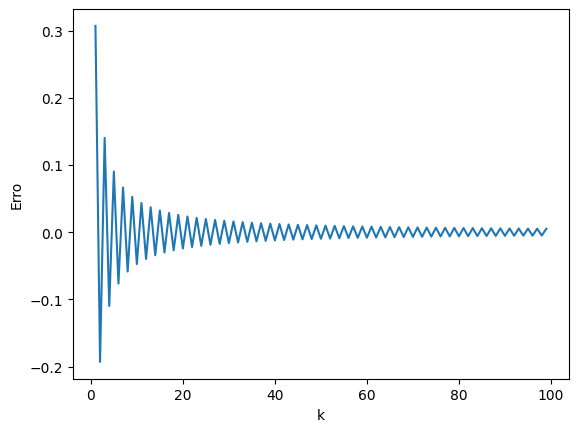

In [ ]:
import matplotlib.pyplot as plt
import math

n = 100
erro = []
s = 0
for k in range(1,n):
    s = s + ((-1)**(k+1))/k
    erro.append(s - math.log(2))
plt.plot(range(1,n), erro)
plt.xlabel("k")
plt.ylabel("Erro")



---



## ❗ Atividade ❗

Para essa atividade, vamos usar o último dígito não nulo do seu número USP. Isso pode ser obtido usando o seguinte código:

In [ ]:
# Digite aqui o seu NUSP!!!!
nusp = 12554400
# ------------------------

#Transforma inteiro em lista
vetor_nusp = [int(a) for a in str(nusp)]

#Tira os zeros
vetor_nusp_sem_zero = [x for x in vetor_nusp if x>0]

#Guardamos o último dígito não nulo na variável nusp_num
nusp_num = vetor_nusp_sem_zero[-1]

print(nusp, vetor_nusp, vetor_nusp_sem_zero, nusp_num)

12554400 [1, 2, 5, 5, 4, 4, 0, 0] [1, 2, 5, 5, 4, 4] 4


Vamos à atividade!

Considere uma amostra de $N$ dados com distribuição normal com média $\mu$ e desvio $\sigma$. Podemos obter essa amostra (valores $\{x_i\}_{i=1,...,N}$) em Python usando o seguinte código:

In [ ]:
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
import numpy as np
mu, sigma = 0, 0.1 # mean and standard deviation
x = np.random.normal(mu, sigma, 10000)

Graficamente, podemos fazer o histograma desses dados amostrados e comparar a curva Normal:

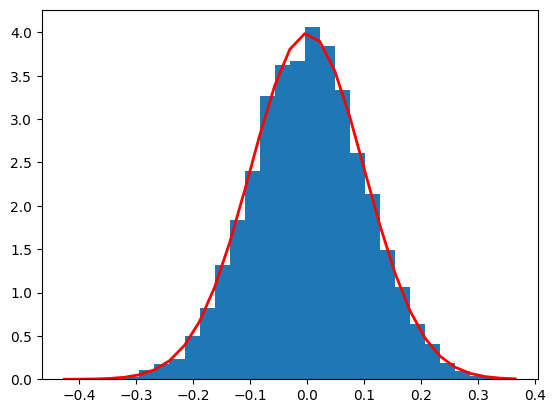

In [ ]:
import matplotlib.pyplot as plt

#Amostra
count, bins, ignored = plt.hist(x, 30, density=True)

# Curva Normal de referência
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()



---



Nosso objetivo é calcular um tipo de "variância" desse vetor $x$ de amostras (na verdade é o momento de 4a ordem, relacionado com algo conhecido como Kurtosis)

$$
m(x) = \frac{1}{N}\sum_{i=1}^{N} (x_i - \bar{x})^4 \\
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$
onde $\bar{x}$ é a média do vetor $x$. Note que a potência dessa variância é 4, e não 2 como de costume.


❗ Exercício ❗

Proponha um método para esse cálculo do 4o momento usando funções nativas do python. Use uma amostra de tamanho $N=1000000$ e considere $\mu=0$ e $\sigma$ igual ao último dígito não nulo do seu número usp.

1. Qual o valor obtido e como esse valor se relaciona com o seu $\sigma$?
2. Registre o tempo de execução.

In [ ]:
N = 1000000
soma = 0
for p in x:
  soma = soma + p
media = soma/N

Códigos :

In [ ]:
#Método 4o momento ingênuo

import math
import time
import numpy as np

t0 = time.time()

N = 1000000
nusp = 12554400

vetor_nusp = [int(a) for a in str(nusp)]              # Transforma o nusp em string, depois cria uma lista com os inteiros contidos na string
vetor_nusp_sem_zero = [x for x in vetor_nusp if x>0]  # Retira todos os zeros do nusp
nusp_num = vetor_nusp_sem_zero[-1]                    # Cria uma lista com apenas o último valor da lista anterior e armazena na variável nusp_num

x = np.random.normal(0, nusp_num, N)                  # Gera os valores com media zero e variancia 4

soma_vetor_x = 0

for i in x:
  soma_vetor_x = soma_vetor_x + i

media = soma_vetor_x / N                              # Valor do x barra
#print(soma_vetor_x)
#print(media)

soma_4_momento = 0

for j in x:
  soma_4_momento = soma_4_momento + ((j - media)**4)

m4 = soma_4_momento / N                               # Valor do 4 momento

print(m4)
tf = time.time() - t0
print(tf,"segundos")





768.7167314185247
0.616419792175293 segundos


O valor encontrado para o quarto momento ficou entre 766 e 772 (dado algumas compilações para teste e a aleatoriedade que gera o vetor x).
Esse valor segue uma relação que se aproxima de 3*(sigmaˆ4), sendo meu valor de sigma igual a 4, temos 3 * 4ˆ4 = 768.





---



---



## Voltando ao exemplo da série harmônica

Você consegue melhorar o nosso exemplo inicial para obter exatamente o mesmo resultado pelo menos 10x mais rápido?

Dica, use numpy: https://numpy.org/doc/stable/user/quickstart.html

Mais adiante vamos explicar os detalhes, mas por ora vamos direto ao ponto e ver uma possibilidade de código mais eficiente para a mesma conta.

In [ ]:
# O caso mais eficiente - série harmônica alternante - aproxima ln(2)

import time
import math

#Vamos usar o numpy!
import numpy as np

n = 40000000 # Nosso infinito

#Método ingênuo
tempo_inicial = time.time() # Essa variável vai contar o tempo de execução
soma = 0.0                  # Essa variável vai acumular a soma da série
# Vamos fazer a soma
for k in range(1,n+1):
    soma = soma + ((-1)**(k+1))/(k)  #Termo principal da soma

tempo_de_execução = time.time() - tempo_inicial # Quanto tempo se passou, em segundos
print("Ingênuo ---> Soma:", soma, " Valor exato:", math.log(2.0), "Erro:", soma - math.log(2.0), " Tempo de execução:", tempo_de_execução, "segundos.")

#Método vetorial
tempo_inicial = time.time() # Essa variável vai contar o tempo de execução
a = 1/np.arange(1,n+1)        # Gera um vetor de números de 1/1, 1/2, até 1/n
b = np.ones(n)                # Vetor de valores 1
b[1::2] = -1                  # Troca o sinal de b nos a cada 2 elementos
soma = np.sum(a*b)            # Faz o produto entre elementos de 'a' e 'b' e soma
tempo_de_execução_2 = time.time() - tempo_inicial #Quanto tempo levou
print("Vetorial --> Soma:", soma, " Valor exato:", np.log(2.0), "Erro:", soma - np.log(2.0), " Tempo de execução:", tempo_de_execução_2, "segundos.")
ganho = tempo_de_execução/ tempo_de_execução_2
print("Ganho de tempo: ", ganho, " vezes mais rápido")

Ingênuo ---> Soma: 0.6931471680601587  Valor exato: 0.6931471805599453 Erro: -1.249978653916628e-08  Tempo de execução: 24.016206741333008 segundos.
Vetorial --> Soma: 0.6931471680599443  Valor exato: 0.6931471805599453 Erro: -1.2500001034254637e-08  Tempo de execução: 0.9193503856658936 segundos.
Ganho de tempo:  26.123018074265406  vezes mais rápido


_Este exemplo é para deixar claro que implementações ingênuas em Python podem gerar tempos de processamentos absurdos! Evite "loops" em python em ranges grandes (vetores e matrizes) -> use numpy e aritmética vetorial!_

**Qual é o "pulo do gato"?**

- As operações no primeiro caso são **interpretadas** a cada iteração
- As operações no segundo caso executam códigos pré **compilados** de C

 As funções "arange", "=", "*", "/", "sum" são implementadas em C e pré-compiladas. Ao pré-compilar essas funções, os executáveis resultantes tem rotinas otimizadas (máquina-dependente) para cálculos de operações vetoriais.


A ideia central será usar numpy e ferramentas de vetorização

## Brevíssima introdução ao Numpy

In [ ]:
# Operações com listas grandes
n=4000000
a = list(range(n)) #Lista com [0,1,2,3...]
print(a[:100])

b = [ 0 ] * n # Lista com zeros, do tamanho da lista 'a'
print(b[:100])


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:

import time
tempo_inicial = time.time() # Essa variável vai contar o tempo de execução
for i in range(len(a)):
  b[i] = a[i]**2
tempo_de_execução = time.time() - tempo_inicial #Quanto tempo levou
print(tempo_de_execução, " segundos")



print(b[:20])

1.748002290725708  segundos
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361]


Parece ok, mas isso é muito lento. Alternativa: usar numpy

In [ ]:
import numpy as np
a = np.arange(10000)
b = np.zeros(10000)
print(a)

[   0    1    2 ... 9997 9998 9999]


In [ ]:

tempo_inicial = time.time() # Essa variável vai contar o tempo de execução
b=a**2
tempo_de_execução_2 = time.time() - tempo_inicial #Quanto tempo levou
print(tempo_de_execução_2, " segundos")
print(tempo_de_execução/tempo_de_execução_2, " vezes mais rápido")

0.00020503997802734375  segundos
8525.177906976744  vezes mais rápido


**Listas ou vetores (numpy arrays)?**

- Listas são mais flexiveis (inclusão/remoção de termos simples) e podem ter variáveis de tipos diferentes. Os dados podem ficar espalhados na memória, logo o acesso pode ser mais lento. Ideal para programas heterogêneos que exigem flexibilidade.


- Vetores são preferencialmente constituídos de um número fixo de elementos do mesmo tipo. Os dados ficam alinhados na memória de forma compacta, logo o acesso pode ser mais rápido. Menos flexíveis (inclusões/remoções mais lentas). Permite usarmos funções pré-compiladas do numpy, escrito em C/C++ e otimizadas para performance. Ideal para algebra linear, computação científica e bases de dados grandes.

**Trabalhando com "arrays"**

In [ ]:
lista = [1,2,3]                   #lista
a = np.array(lista)               # 1-dimensional array (rank 1)
b = np.array([[1,2,3]  ,[4,5,6]])   # 2-dimensional array (rank 2)
print(a)
print(b)
i, j = b.shape
print(b.shape, i, j)                      # the shape (rows,columns)
print(b.size)                       # number of elements

[1 2 3]
[[1 2 3]
 [4 5 6]]
(2, 3) 2 3
6


In [ ]:
print(np.zeros((2, 3)))             # 2x3 array with all elements 0
print(np.ones((1,2)))               # 1x2 array with all elements 1
print(np.full((2,2),7) )            # 2x2 array with all elements 7
print(np.eye(2))                    # 2x2 identity matrix

print(np.arange(10))                # Evenly spaced values in an interval
print(np.linspace(0,9,10))          # same as above


[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[0 1 2 3 4 5 6 7 8 9]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [ ]:
d = np.ones((2, 3))
print(d)
print(d.dtype)                    # datatype of the array
d = d.astype('int')            # change datatype from boolean to integer
print(d)
print(d.dtype)

[[1. 1. 1.]
 [1. 1. 1.]]
float64
[[1 1 1]
 [1 1 1]]
int64


**Operações**

In [ ]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
print(a)
print(b)
print()

# Addition
c = a + b
d = np.add(a,b)
print(c)
print(d)
print()

# Matrix multiplication
e = a @ b
f = np.dot(a, b)
print(e)
print(f)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]

[[ 6  8]
 [10 12]]
[[ 6  8]
 [10 12]]

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Operações _in place_

Podemos evitar cópias em memória para ter algum ganho de performance

In [ ]:
n = 40000000    # Nosso número grande
a = np.ones(n) # Um grande vetor de 1s
c = 3.0        # Uma constante
%time a = c*a  # Dessa forma primeiro é feito 'a*c' e depois isso é associado a 'a'
%time a *= c   # Dessa forma o 'c' é multiplicado por 'a' e diretamente salva em 'a'

CPU times: user 50.7 ms, sys: 69 ms, total: 120 ms
Wall time: 119 ms
CPU times: user 38.2 ms, sys: 0 ns, total: 38.2 ms
Wall time: 39.7 ms




---



## Voltando novamente ao exemplo da série harmônica


In [ ]:
# O caso mais eficiente - série harmônica alternante - aproxima ln(2)

import time
import math

#Vamos usar o numpy!
import numpy as np

n = 4000000 # Nosso infinito

#Método ingênuo
tempo_inicial = time.time() # Essa variável vai contar o tempo de execução
soma = 0.0                  # Essa variável vai acumular a soma da série
# Vamos fazer a soma
for k in range(1,n+1):
    soma = soma + ((-1)**(k+1))/(k)  #Termo principal da soma

tempo_de_execução = time.time() - tempo_inicial # Quanto tempo se passou, em segundos
print("Ingênuo ---> Soma:", soma, " Valor exato:", math.log(2.0), "Erro:", soma - math.log(2.0), " Tempo de execução:", tempo_de_execução, "segundos.")

#Método vetorial
tempo_inicial = time.time() # Essa variável vai contar o tempo de execução
a = 1/np.arange(1,n+1)        # Gera um vetor de números de 1/1, 1/2, até 1/n
b = np.ones(n)                # Vetor de valores 1
b[1::2] = -1                  # Troca o sinal de b nos a cada 2 elementos
soma = np.sum(a*b)            # Faz o produto entre elementos de 'a' e 'b' e soma
tempo_de_execução_2 = time.time() - tempo_inicial #Quanto tempo levou
print("Vetorial --> Soma:", soma, " Valor exato:", np.log(2.0), "Erro:", soma - np.log(2.0), " Tempo de execução:", tempo_de_execução_2, "segundos.")
ganho = tempo_de_execução/ tempo_de_execução_2
print("Ganho de tempo: ", ganho, " vezes mais rápido")

Ingênuo ---> Soma: 0.6931470555600031  Valor exato: 0.6931471805599453 Erro: -1.2499994217485266e-07  Tempo de execução: 2.1329643726348877 segundos.
Vetorial --> Soma: 0.6931470555599609  Valor exato: 0.6931471805599453 Erro: -1.249999843633276e-07  Tempo de execução: 0.05887722969055176 segundos.
Ganho de tempo:  36.22732224062458  vezes mais rápido


---

---

## ❗ Atividade ❗

Nosso objetivo é novamente o de calcular um tipo de "variância" desse vetor $x$ de amostras (na verdade é o momento de 4a ordem, relacionado com algo conhecido como Kurtosis)

$$
m(x) = \frac{1}{N}\sum_{i=1}^{N} (x_i - \bar{x})^4 \\
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$
onde $\bar{x}$ é a média do vetor $x$. Note que a potência dessa variância é 4, e não 2 como de costume.




Você deve propor ao menos 3 métodos para esse cálculo:

1. Método ingênuo usando funções nativas do Python, apenas com listas e usando laços com "for" e a definição de média e variância (Você já fez essa atividade!)
2. Método com vetores numpy, mas seguindo as definições de média e da variância dadas e sem usar funções pré-programadas do numpy de média/variância.
3. Método usando quaisquer funções pré-implementadas de numpy ou até de outras bibliotecas (pode usar a biblioteca scipy!).

Em todos os casos, use uma amostra de tamanho $N=1000000$ e considere $\mu=0$ e $\sigma$ igual ao último dígito não nulo do seu número usp, sempre registrando o tempo de execução.

In [ ]:
N = 1000000
mu, sigma = 0, nusp_num # mean and standard deviation
x = np.random.normal(mu, sigma, N)


#print(nusp_num)
print(x)

[ 6.9947274   4.28792277 -0.19909204 ... -2.40228834  2.23087032
 -4.27135711]


1) Método ingênuo

In [ ]:
#Método 4o momento
# Ingênuo


import math
import time
import numpy as np

t0 = time.time()

N = 1000000

soma_vetor_x = 0

for i in x:
  soma_vetor_x = soma_vetor_x + i

media = soma_vetor_x / N                              # Valor do x barra
#print(soma_vetor_x)
#print(media)

soma_4_momento = 0

for j in x:
  soma_4_momento = soma_4_momento + ((j - media)**4)

m4 = soma_4_momento / N                               # Valor do 4 momento

print(m4)
tf = time.time() - t0
print(tf,"segundos")


768.5270647150506
0.6395654678344727 segundos


2) Método com numpy básico

In [ ]:
#Método numpy

import math
import time
import numpy as np

t0_2 = time.time()

N = 1000000

a = np.array(x)
#print(a)

media = np.sum(a) / N

#print(media)

m4 = 1/N * np.sum((a - media)**4)

print(m4)

tf_2 = time.time() - t0_2

print(tf_2, "segundos")







768.5270647150626
0.07123064994812012 segundos


3) Método com funções pré-implementadas



In [ ]:
#Método com funções pré-implementadas

import math
import time
import numpy as np

t0_3 = time.time()
#m = np.sum((x - np.mean(x))**4) / N
x -= np.mean(x)
m = np.sum(x**4) / N

print(m)

tf_3 = time.time() - t0_3
print(tf_3, "segundos")

768.5270647150626
0.03779125213623047 segundos


---

## Construindo gráficos
É possível gerar figuras e gráficos no Python usando a biblioteca `Matplotlib`.


In [ ]:
import matplotlib.pyplot as plt



Primeiramente, geramos a figura que vai conter todos os elementos gráficos desejados. Também guardamos os eixos onde vamos plotar nossos pontos.



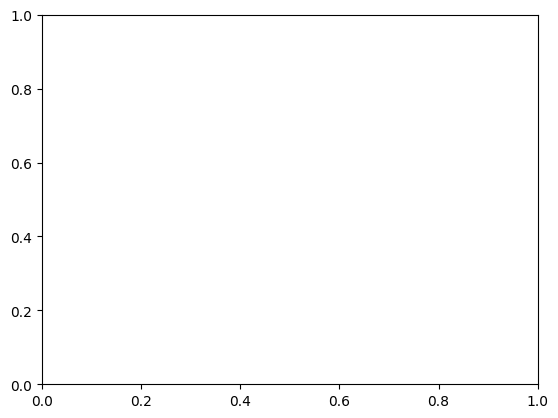

In [ ]:
figure, ax = plt.subplots() # Utilizamos a função subplots do matplotlib

Agora geramos uma série de pontos com o `Numpy` e plotamos o gráfico.

In [ ]:
x = np.linspace(0, 2*np.pi, 50) # 50 pontos igualmente espaçados entre 0 e 2pi
y = np.sin(x) # y = sin(x)

ax.plot(x,y)

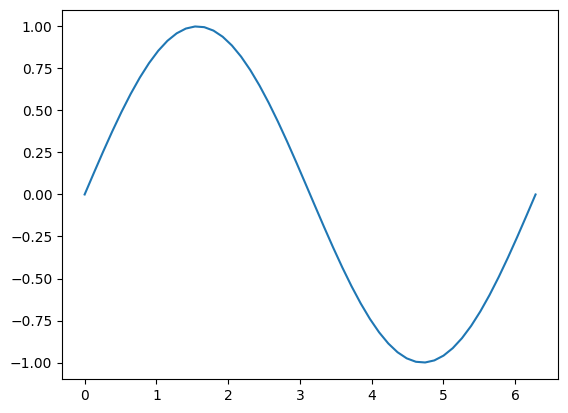

In [ ]:
figure

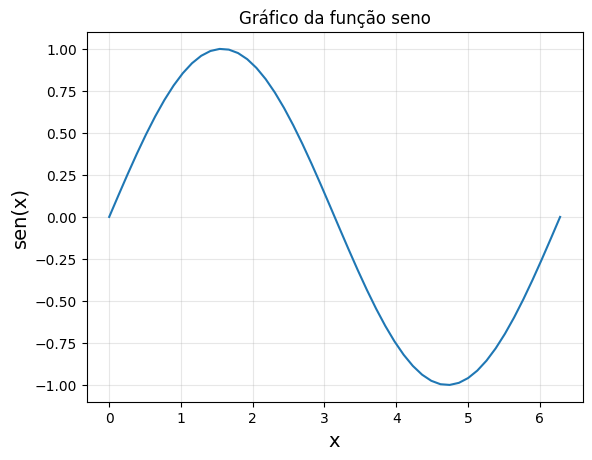

In [ ]:
ax.set_xlabel("x", fontsize=14) # nome do eixo-x
ax.set_ylabel("sen(x)", fontsize=14) # nome do eixo-y
ax.set_title("Gráfico da função seno") # título
ax.grid(alpha=0.3) # Colocando uma malha. O parâmetro alpha determina a transparência
figure

Também é possível plotar vários gráficos na mesma figura.

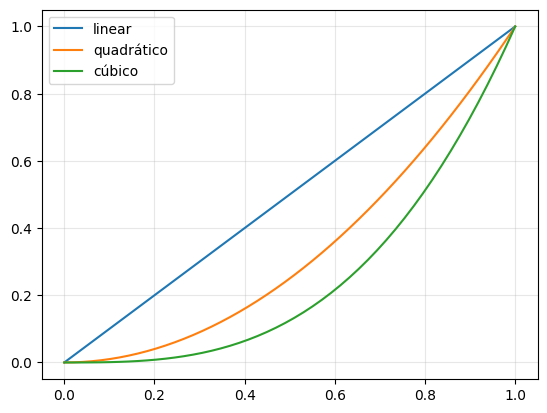

In [ ]:
figure, ax = plt.subplots()
x = np.linspace(0,1,50)

# o parâmetro label identifica o gráfico na legenda
ax.plot(x, x**1, label='linear')
ax.plot(x, x**2, label='quadrático')
ax.plot(x, x**3, label='cúbico');

ax.legend() #função para construir legendas
ax.grid(alpha=0.3)

---

### 🧩 Exercício Opcional 🧩

Seja $n$ o último dígito não nulo do seu número USP. Considere a seguinte função

$$
f(x) = \sin((n+1)x)
$$

Faça um gráfico desta função e de sua derivada no intervalo $[-\pi,\pi]$ com 200 pontos igualmente espaçados.

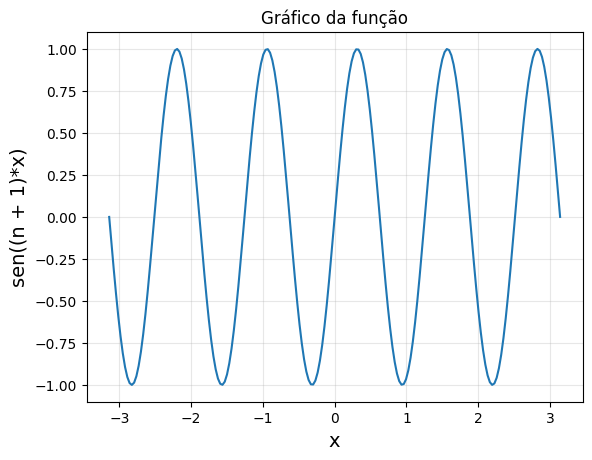

In [ ]:
#Código

import matplotlib.pyplot as plt
figure, ax = plt.subplots()                     # Utilizamos a função subplots do matplotlib

x = np.linspace(-np.pi, np.pi, 200)             # 200 pontos igualmente espaçados entre -pi e pi
y = np.sin((nusp_num  + 1) * x)                   # y = sin((n + 1)x)

ax.plot(x,y)

ax.set_xlabel("x", fontsize=14)                 # nome do eixo-x
ax.set_ylabel("sen((n + 1)*x)", fontsize=14)    # nome do eixo-y
ax.set_title("Gráfico da função")               # título
ax.grid(alpha=0.3)                              # Colocando uma malha. O parâmetro alpha determina a transparência


x = Symbol('x')
f = sin((nusp_num + 1) * x)
diff(f, x)                                  #como plotar agora?

a = np.linspace(-np.pi, np.pi, 200)
b = diff(f, x)


---

## Tópico Avançado (opcional, se der tempo)

#### Uso de memória

O tempo de execução é importante, mas o uso de memoria também é!

Vamos simplesmente guardar um tensor de ordem 3 (um "cubo", generalizando uma matriz) com

$$
R_{ijk}=\sqrt{i^2+j^2+k^2}
$$

In [ ]:
#Matrizes - a forma ingênua
n = 100
R = np.empty((n,n,n))  # Um "cubo" vazio de n x n x n (um tensor de ordem 3)
start_time = time.time()
for i in range(n):
    for j in range(n):
        for k in range(n):
            R[i, j, k] = np.sqrt(i*i + j*j + k*k) # Vamos guardar a raíz dos quadrados dos índices do tensor
tempo = time.time() - start_time
print("Com loops              : %s seconds " % tempo, " Memória auxiliar: ", 0.0, "MB")


Com loops              : 6.108183860778809 seconds   Memória auxiliar:  0.0 MB


O método acima é demorado, mas só foi necessário armazenar a matriz que nos interessa, sem variáveis auxiliares.

Podemos fazer isso mais rápido com vetorização, mas isso pode ter um custo de memória com variáveis auxiliares. Vejamos abaixo.

In [ ]:
#Alternativas - vetorização!
n = 100
#Usando mais memória
start_time = time.time()
#constroi cubos completos com valores de i, j, k
i, j, k = np.mgrid[:n, :n, :n]
R1 = np.sqrt(i**2 + j**2 + k**2)
tempo = time.time() - start_time
print("Com grids auxiliares   : %s seconds " % tempo, " Memória auxiliar: ", 3*i.nbytes/1024/1024, "MB")


#Ver se bateu
print(" Check:", np.max(np.max(np.max(np.abs(R1-R)))))

Com grids auxiliares   : 0.08768773078918457 seconds   Memória auxiliar:  22.88818359375 MB
 Check: 0.0


Bem mais rápido, mas usamos mais memória...

Será que conseguimos fazer algo que não use tanta memória?

In [ ]:
#Usando menos memória
start_time = time.time()
#constroi vetores com valores de i, j, k
# Vetor i no sentido de "linha"/"largura"
i = np.arange(n).reshape(n, 1, 1)
# Vetor j no sentido de "coluna"/"altura"
j = np.reshape(i, (1, n, 1))
# Vetor k no sentido de "profundidade"
k = np.reshape(i, (1, 1, n))

#Alternativa para criar os 3 vetores acima de uma vez
#i, j, k = np.ogrid[:n, :n, :n]
R2 = np.sqrt(i**2 + j**2 + k**2)
tempo = time.time() - start_time
print("Com vetores auxiliares : %s seconds " % tempo, " Memória auxiliar: ", 3*i.nbytes/1024/1024, "MB")
print()

#Ver se bateu
print(" Check:",  np.max(np.max(np.max(np.abs(R2-R)))))

Com vetores auxiliares : 0.021437883377075195 seconds   Memória auxiliar:  0.002288818359375 MB

 Check: 0.0


_A diferença de processamento e memória pode ser muito grande!_



---



  ### Cache e stride

**Cache**

Memória volátil (guarda coisas temporárias) de acesso rápido ao processador.

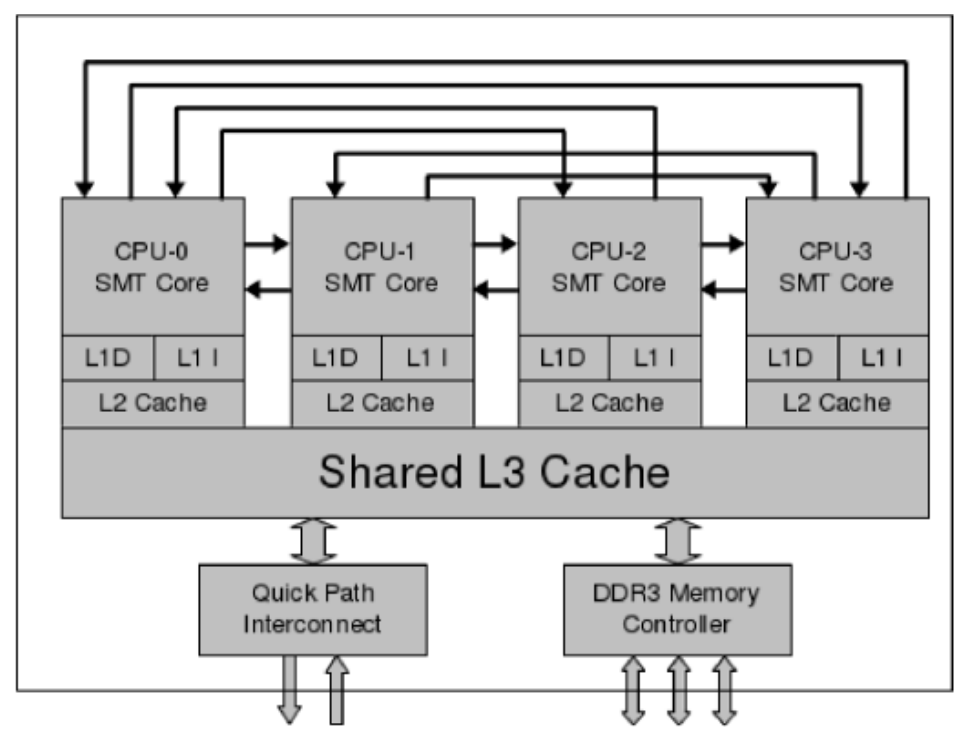

Intel Core i7 Processor Architechture Layout with Simultaneous Multi-threading (SMT)

https://fm.csl.sri.com/LAW09/2011/law2011-paper-bradetich.pdf


**Uso de memória**

Toda vez que passo um número da memória RAM para o processador fazer uma conta, ele não passa apenas esse número, mas tudo que tiver na memória em torno desse número (bloco) que caiba no cache!

_Exemplo idealizado:_

Caso 1:

    Memória tem os números guardados:
    3 , 7 , 8 , 23 , 54 , 77 , 40 , 45

    Quero fazer a conta 3 + 40, e a minha memória cache tem 2 blocos de memória, onde em cada um cabem 2 números por vez apenas, como o computador faz a conta?

    1) O processador pede o número 3 para a memória principal e salva o (3, 7) no bloco 1 cache

    2) O processador pede o número 40 para a memória principal e salva o (40, 45) no bloco 2 cache

    3) Os dois blocos levam as informações para os registradores do processador, e dependendo do processador, ele faz a conta de forma vetorial (3,7) + (40, 45) e retorna (43, 52), sendo o valor 43 salvo na memória RAM no endereço solicitado.
    
    4) Agora, se queremos fazer a conta 8 + 45, o processador pede para jogarem fora o bloco 1 do cache e preencher com (8, 23) para fazer a nova conta, usando o bloco 2 já salvo no cache.
    
    
Caso 2:

    Memória tem os números guardados (vejam a troca do 7 pelo 8):
    3 , 8 , 7 , 23 , 54 , 77 , 40 , 45

    Quero fazer a conta 3 + 40, e a minha memória cache tem 2 blocos de memória, onde em cada um cabem 2 números por vez apenas, como o computador faz a conta?

    1) O processador pede o número 3 para a memória principal e salva o (3, 8) no bloco 1 cache

    2) O processador pede o número 40 para a memória principal e salva o (40, 45) no bloco 2 cache

    3) Os dois blocos levam as informações para os registradores do processador, e dependendo do processador, ele faz a conta de forma vetorial (3,8) + (40, 45) e retorna (43, 53), sendo o valor 43 salvo na memória RAM no endereço solicitado.
    
    4) Agora, se queremos fazer a conta 8 + 45, o processador já percebe que as informações relevantes estão em cache, e a conta da operação é aproveitada, devolvendo o 53 na memória (caso o processador seja vetorial). Ou então, para um processador não vetorial, ele já tem as informações para fazer a conta rapidamente, sem precisar acessar a RAM!
    
**Alinhamento de memória**

As contas devem ser preferencialmente feitas na ordem em que os dados estão na memória!!!! Quando o processador precisa ficar pedindo novos dados à RAM dizemos que está ocorrendo muito __cache miss__

O caso de um computador real é um pouco mais complicado, mas esse conceito ainda é válido. Mais detalhes em https://courses.cs.washington.edu/courses/cse378/09wi/lectures/lec15.pdf


### Matrizes na memória

In [ ]:
#Matriz
import numpy as np

n = 20000
c = np.ones((n, 2*n))
linhas, colunas = c.shape
print("Matriz: ", c.shape, "\n", c)
print()

#Soma, para cada coluna, os valores das linhas primeiro
#Código ingênuo
#s = 0
#for j in range(colunas):
#    for i in range(linhas):
#        s = s + c[i,j]
#Código vetorizado
%time s = np.sum(c.sum(axis=0)) #axis=0 significa que vai soma as linhas para cada coluna primeiro!
print("Soma coluna a coluna:", s)
print()

#Soma, para cada linha, os valores das colunas primeiro
#Código ingênuo
#s = 0
#for i in range(linhas):
#    for j in range(colunas):
#        s = s + c[i,j]
#Código vetorizado
%time s = np.sum(c.sum(axis=1)) #axis=1  significa que vai somar nas colunas primeiro
print("Soma linha a linha: ", s)
print()



Matriz:  (20000, 40000) 
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]

CPU times: user 981 ms, sys: 2.78 ms, total: 984 ms
Wall time: 1.5 s
Soma coluna a coluna: 800000000.0

CPU times: user 942 ms, sys: 1.26 ms, total: 943 ms
Wall time: 1.41 s
Soma linha a linha:  800000000.0



Se ele vai mais rápido somando primeiro as colunas de cada linha, então ele deve armazenar na ordem de linhas!! Isso é chamado de ordem no estilo "C" (padrão em Python) - Row-major order

Ordem C:

         -------------------
         -------------------
         -------------------
         -------------------
         -------------------
         
É possível pedir para o Python armazenar de outro jeito, a ordem no estilo Fortran - Column-major order

Ordem Fortran:

               | | | | | | | |
               | | | | | | | |
               | | | | | | | |               
               | | | | | | | |
               | | | | | | | |               


Mais info em : https://scipy-lectures.org/advanced/advanced_numpy/index.html#cache-effects

Ordem C (por linhas):

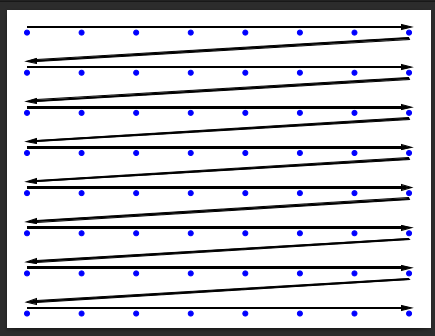

Ordem Fortran (por colunas):

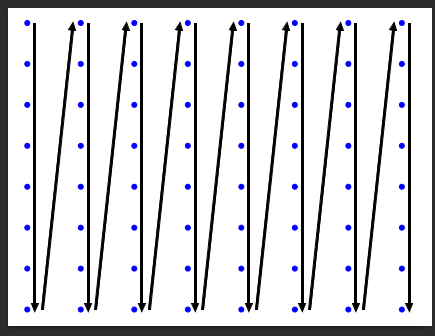

In [ ]:
#Repetindo o exemplo anterior com ordem Fortran

#Matriz
import numpy as np

n = 10000
c = np.ones((n, 2*n), order='F')
linhas, colunas = c.shape
print("Matriz: ", c.shape, "\n", c)
print()

#Soma, para cada coluna, os valores das linhas primeiro
#Código ingênuo
#s = 0
#for j in range(colunas):
#    for i in range(linhas):
#        s = s + c[i,j]
#Código vetorizado
%time s = np.sum(c.sum(axis=0)) #axis=0 significa que vai soma as linhas para cada coluna primeiro!
print("Soma coluna a coluna:", s)
print()

#Soma, para cada linha, os valores das colunas primeiro
#Código ingênuo
#s = 0
#for i in range(linhas):
#    for j in range(colunas):
#        s = s + c[i,j]
#Código vetorizado
%time s = np.sum(c.sum(axis=1)) #axis=1  significa que vai somar nas colunas primeiro
print("Soma linha a linha: ", s)
print()


Matriz:  (10000, 20000) 
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]

CPU times: user 248 ms, sys: 28.2 ms, total: 276 ms
Wall time: 388 ms
Soma coluna a coluna: 200000000.0

CPU times: user 295 ms, sys: 3.51 ms, total: 299 ms
Wall time: 415 ms
Soma linha a linha:  200000000.0



Note que agora ficou mais rápido lendo coluna a coluna (significa que vai somar as linhas para cada coluna primeiro!)!

### Stride e sua relação com cache miss

Strides: número de bytes para pular na memória até chegar no próximo elemento.

Exemplo: Uma matrix 10x10 com stride de (10,1) significa que:
- Para chegar na próxima linha tem que pular 10 bytes
- Para chegar na próxima coluna, basta olhar o próximo byte

Logo, isso está fortemente conectado ao conceito visto antes de ordenamento.


In [ ]:
#Cada inteiro neste caso foi forçado a ocupar 2 bytes na memória (16 bits). 1 byte = 8 bits
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=np.int16, order='C')

print("Ordem C: ", x.strides)

x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]], dtype=np.int16, order='F')

print("Ordem F: ", x.strides)

Ordem C:  (6, 2)
Ordem F:  (2, 6)


Logo, no Python podemos especificar a ordem de armazenamento dos elementos de uma matriz para aumentar a eficiência do código.